In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import sys
from tqdm import tqdm
sys.path.insert(0, '/mnt/lareaulab/cfbuenabadn/psix_project/psix/psix/')
import psix

cm = 1/2.54

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams["axes.facecolor"] = 'white'

import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt

mpl.rcParams["mathtext.fontset"] = "stix"
mpl.rcParams['pdf.fonttype'] = 42

import warnings
warnings.filterwarnings("ignore")

In [2]:
# psix_p90.compute_neighbors_psi(n_neighbors=30)
# np.sum((psix_p90.psix_results.qvals <= 0.05) & (psix_p90.psix_results.psix_score > 0))

In [3]:
latent = pd.read_csv('data/preprocess/tables/pc3_rd.tab.gz', sep='\t', index_col=0)
meta = pd.read_csv('data/SraRunTable.txt.gz', index_col=0).loc[latent.index]


p90_cells = meta.loc[meta.Age == 'postnatal day 90'].index 
p1_cells = meta.loc[meta.Age == 'postnatal day 1'].index 
e18_cells = meta.loc[meta.Age == 'embryonic day 18.5'].index 
e15_cells = meta.loc[meta.Age == 'embryonic day 15.5'].index 
e13_cells = meta.loc[meta.Age == 'embryonic day 13.5'].index 

latent.loc[p90_cells, ['PC_1','PC_2', 'PC_3']].to_csv('data/preprocess/tables/p90_rd.tab.gz', sep='\t', index=True, header=True)
latent.loc[p1_cells, ['PC_1','PC_2', 'PC_3']].to_csv('data/preprocess/tables/p1_rd.tab.gz', sep='\t', index=True, header=True)
latent.loc[e18_cells, ['PC_1','PC_2', 'PC_3']].to_csv('data/preprocess/tables/e18_rd.tab.gz', sep='\t', index=True, header=True)
latent.loc[e15_cells, ['PC_1','PC_2', 'PC_3']].to_csv('data/preprocess/tables/e15_rd.tab.gz', sep='\t', index=True, header=True)
latent.loc[e13_cells, ['PC_1','PC_2', 'PC_3']].to_csv('data/preprocess/tables/e13_rd.tab.gz', sep='\t', index=True, header=True)

# latent.loc[p90_cells, ['PC_3']].to_csv('data/preprocess/tables/p90_rd.tab.gz', sep='\t', index=True, header=True)
# latent.loc[p1_cells, ['PC_3']].to_csv('data/preprocess/tables/p1_rd.tab.gz', sep='\t', index=True, header=True)
# latent.loc[e18_cells, ['PC_3']].to_csv('data/preprocess/tables/e18_rd.tab.gz', sep='\t', index=True, header=True)
# latent.loc[e15_cells, ['PC_3']].to_csv('data/preprocess/tables/e15_rd.tab.gz', sep='\t', index=True, header=True)
# latent.loc[e13_cells, ['PC_3']].to_csv('data/preprocess/tables/e13_rd.tab.gz', sep='\t', index=True, header=True)

In [4]:
data_dir = 'data/pipeline_output/'
skipped_exons = pd.read_csv(data_dir + 'SE_counts.tab.gz', sep='\t', index_col=0)
tpm = pd.read_csv(data_dir + 'rsem_gene_tpm.tab.gz', sep='\t', index_col=0)
ci = pd.read_csv(data_dir + 'constitutive_introns.tab.gz', sep=',', index_col=0)

In [5]:
ci[p1_cells].to_csv('data/preprocess/tables/p1_constitutive_introns_filtered.tab.gz', sep='\t', index=True, header=True)
skipped_exons[p1_cells].to_csv('data/preprocess/tables/p1_SE_counts_filtered.tab.gz', sep='\t', index=True, header=True)
tpm[p1_cells].to_csv('data/preprocess/tables/p1_rsem_gene_tpm_filtered.tab.gz', sep='\t', index=True, header=True)

ci[e13_cells].to_csv('data/preprocess/tables/e13_constitutive_introns_filtered.tab.gz', sep='\t', index=True, header=True)
skipped_exons[e13_cells].to_csv('data/preprocess/tables/e13_SE_counts_filtered.tab.gz', sep='\t', index=True, header=True)
tpm[e13_cells].to_csv('data/preprocess/tables/e13_rsem_gene_tpm_filtered.tab.gz', sep='\t', index=True, header=True)

ci[e15_cells].to_csv('data/preprocess/tables/e15_constitutive_introns_filtered.tab.gz', sep='\t', index=True, header=True)
skipped_exons[e15_cells].to_csv('data/preprocess/tables/e15_SE_counts_filtered.tab.gz', sep='\t', index=True, header=True)
tpm[e15_cells].to_csv('data/preprocess/tables/e15_rsem_gene_tpm_filtered.tab.gz', sep='\t', index=True, header=True)

ci[e18_cells].to_csv('data/preprocess/tables/e18_constitutive_introns_filtered.tab.gz', sep='\t', index=True, header=True)
skipped_exons[e18_cells].to_csv('data/preprocess/tables/e18_SE_counts_filtered.tab.gz', sep='\t', index=True, header=True)
tpm[e18_cells].to_csv('data/preprocess/tables/e18_rsem_gene_tpm_filtered.tab.gz', sep='\t', index=True, header=True)



In [6]:
psix_p90 = psix.Psix()
psix_p90.process_rnaseq(
    exon_sj_file = 'data/preprocess/tables/p90_SE_counts_filtered.tab.gz',
    constitutive_sj_file = 'data/preprocess/tables/p90_constitutive_introns_filtered.tab.gz',
    tpm_file = 'data/preprocess/tables/p90_rsem_gene_tpm_filtered.tab.gz',
        minJR = 1,
        minCell=1,
        min_observed = 0.25, min_psi = 0.05)

psix_p90.compute_psix_scores(latent='data/preprocess/tables/p90_rd.tab.gz', n_jobs=25, 
                                n_random_exons=10000, n_neighbors=30)#, pvals_bins=10)

Obtaining PSI tables...
Reading TPM and transforming to mRNA counts...


100%|██████████| 290/290 [00:13<00:00, 20.76it/s]


Successfully processed RNA-seq data
Computing cell-cell metric...


100%|██████████| 290/290 [00:00<00:00, 1637.73it/s]

Successfully computed cell-cell metric
Computing Psix score in 2115 exons



100%|██████████| 2115/2115 [00:08<00:00, 259.06it/s]


Successfully computed Psix score of exons.
Estimating p-values. This might take a while...


100%|██████████| 25/25 [13:09<00:00, 31.59s/it]  


Successfully estimated p-values


In [7]:
psix_p1 = psix.Psix()
psix_p1.process_rnaseq(
        exon_sj_file = 'data/preprocess/tables/p1_SE_counts_filtered.tab.gz',
        constitutive_sj_file = 'data/preprocess/tables/p1_constitutive_introns_filtered.tab.gz',
        tpm_file = 'data/preprocess/tables/p1_rsem_gene_tpm_filtered.tab.gz',
        minJR = 1,
        minCell=1,
        min_observed = 0.25, min_psi = 0.05)

# psix_p1.compute_psix_scores(latent='data/preprocess/tables/p1_rd.tab.gz', n_jobs=25, 
#                                 n_random_exons=10000, n_neighbors=30)#, pvals_bins=10)

Obtaining PSI tables...
Reading TPM and transforming to mRNA counts...


100%|██████████| 242/242 [00:10<00:00, 22.46it/s]


Successfully processed RNA-seq data


In [8]:
psix_e13 = psix.Psix()
psix_e13.process_rnaseq(
        exon_sj_file = 'data/preprocess/tables/e13_SE_counts_filtered.tab.gz',
        constitutive_sj_file = 'data/preprocess/tables/e13_constitutive_introns_filtered.tab.gz',
        tpm_file = 'data/preprocess/tables/e13_rsem_gene_tpm_filtered.tab.gz',
        minJR = 1,
        minCell=1,
        min_observed = 0.25, min_psi = 0.05)

# psix_e13.compute_psix_scores(latent='data/preprocess/tables/e13_rd.tab.gz', n_jobs=25, 
#                                 n_random_exons=10000, n_neighbors=30)#, pvals_bins=10)

Obtaining PSI tables...
Reading TPM and transforming to mRNA counts...


100%|██████████| 240/240 [00:09<00:00, 24.86it/s]


Successfully processed RNA-seq data


In [9]:
sig_exons_p90 = psix_p90.psix_results.loc[((psix_p90.psix_results.qvals <= 0.05) & (psix_p90.psix_results.psix_score > 0))].index
# sig_exons_p1 = psix_p1.psix_results.loc[((psix_p1.psix_results.qvals <= 0.05) & (psix_p1.psix_results.psix_score > 0))].index
# sig_exons_e13 = psix_e13.psix_results.loc[((psix_e13.psix_results.qvals <= 0.05) & (psix_e13.psix_results.psix_score > 0))].index

In [10]:
len(sig_exons_p90)

78

In [11]:
psix_p90.compute_neighbors_psi(latent='data/preprocess/tables/p90_rd.tab.gz', n_neighbors=30)
psix_p1.compute_neighbors_psi(latent='data/preprocess/tables/p1_rd.tab.gz', n_neighbors=30)
psix_e13.compute_neighbors_psi(latent='data/preprocess/tables/e13_rd.tab.gz', n_neighbors=30)

100%|██████████| 240/240 [00:00<00:00, 18019.03it/s]

Successfully computed neighbors
Successfully computed cell-cell metric
Successfully computed neighbors
Successfully computed cell-cell metric


Successfully computed neighbors


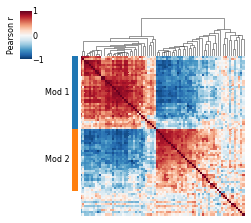

In [12]:
import sys
sys.path.insert(0, '/mnt/lareaulab/cfbuenabadn/psix_project/analysis_psix/utils/')
from misc_utils import *

psix_results = psix_p90.psix_results

background_psi = psix_p90.adata.uns['neighbors_psi'].mask(psix_p90.adata.uns['psi'].isna()).T
exon_list = psix_results.loc[(psix_results.psix_score > 0) & (psix_results.qvals <= 0.05)].index
# exon_list = exon_list & psix_p1.psix_results.index

bwow = compute_modules(background_psi.loc[exon_list].T.corr().fillna(0), 
                min_gene_threshold=20, fdr_threshold=None, z_threshold=0.1, core_only=False)

aver = local_correlation_plot(
            background_psi.loc[exon_list].T.corr().fillna(0), bwow[0], bwow[1],
            mod_cmap='tab10', vmin=-1, vmax=1,
            z_cmap='RdBu_r', yticklabels=False,
    plot_name = 'plots/exon_modules_p90.png', shrink_by=1#/0.5
)

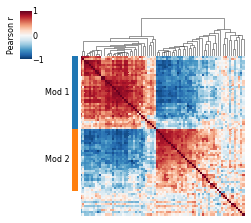

In [131]:
import sys
sys.path.insert(0, '/mnt/lareaulab/cfbuenabadn/psix_project/analysis_psix/utils/')
from misc_utils import *

psix_results = psix_p90.psix_results

background_psi = psix_p90.adata.uns['neighbors_psi'].mask(psix_p90.adata.uns['psi'].isna()).T
exon_list = psix_results.loc[(psix_results.psix_score > 0) & (psix_results.qvals <= 0.05)].index
# exon_list = exon_list & psix_p1.psix_results.index

bwow = compute_modules(background_psi.loc[exon_list].T.corr().fillna(0), 
                min_gene_threshold=20, fdr_threshold=None, z_threshold=0.1, core_only=False)

aver = local_correlation_plot(
            background_psi.loc[exon_list].T.corr().fillna(0), bwow[0], bwow[1],
            mod_cmap='tab10', vmin=-1, vmax=1,
            z_cmap='RdBu_r', yticklabels=False,
    plot_name = 'plots/exon_modules_p90.png', shrink_by=1#/0.5
)

In [13]:
psix_object = psix.Psix()
psix_object.process_rnaseq(
        exon_sj_file = 'data/preprocess/tables/SE_counts_filtered.tab.gz',
        constitutive_sj_file = 'data/preprocess/tables/constitutive_introns_filtered.tab.gz',
        tpm_file = 'data/preprocess/tables/rsem_gene_tpm_filtered.tab.gz',
        minJR = 1,
        minCell=1,
        min_observed = 0.05, min_psi = 0.001)

Obtaining PSI tables...
Reading TPM and transforming to mRNA counts...


100%|██████████| 1067/1067 [00:48<00:00, 22.06it/s]


Successfully processed RNA-seq data


In [14]:
def get_all_exons_neighbors(psi, cell_metric):
    
    neighbors_psi = []
    
    for exon_psi in psi.T:
        neighbors_psi.append(get_exon_neighbors_psi(exon_psi, cell_metric))
        
    return np.array(neighbors_psi)


def get_background(psi, metric):
#     psi = np.array(self.adata.uns['psi'])
    
    neighbors_psi = pd.DataFrame(get_all_exons_neighbors(np.array(psi), metric),
                                 columns = psi.index,
                                 index = psi.columns)
    return neighbors_psi



import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from tqdm import tqdm 
from numba import jit

def compute_cell_metric_light(
    manifold, 
    n_neighbors=100, 
    weight_metric = True,
):
    
    
    cells = manifold.index
    n_cells = len(cells)
    
    knn_neighbors = NearestNeighbors(n_neighbors=n_neighbors+1).fit(manifold)
    distances, indices = knn_neighbors.kneighbors(manifold)
    
    
    
    neighbor_indices = pd.DataFrame(indices, index=cells)
    
    weights = np.ones((len(cells), (n_neighbors+1)))
    
    for i in tqdm(range(len(manifold.index)), position=0, leave=True):
        sigma = np.max(distances[i])
        for j in range(1, len(distances[i])):
            d = distances[i][j]
            w = compute_weight(d, sigma)
            weights[i, j] = w
        
    cell_metric = (indices, weights)
    return cell_metric


@jit(nopython=True)
def compute_weight(d, sigma):
    return np.exp(-(d**2)/(sigma**2)) 


@jit(nopython=True)
def get_exon_neighbors_psi(observed_psi_array, cell_metric):
    psi_a_array = []
    for i in range(len(observed_psi_array)):
#         psi_o = observed_psi_array[i]
                    
#         psi_o_array.append(psi_o)

        neighbors = cell_metric[0][i]
        weights = cell_metric[1][i]

        psi_sum = 0
        weight_sum = 0
        for j in range(len(neighbors)):
            psi_n = observed_psi_array[neighbors[j]]
            if not np.isnan(psi_n):
                psi_sum += (psi_n * weights[j])
                weight_sum += weights[j]
        if weight_sum > 0:
            psi_a_array.append(psi_sum/weight_sum)
        else:
            psi_a_array.append(np.nan)
                
    return psi_a_array


latent = pd.read_csv('data/preprocess/tables/pc3_rd.tab.gz', sep='\t', index_col=0)

cell_metric = compute_cell_metric_light(pd.DataFrame(latent.loc[p90_cells][['PC_1', 'PC_2', 'PC_3']]), n_neighbors=30)
neighbors_psi_p90 = get_background(psix_object.adata.uns['psi'].loc[p90_cells], cell_metric)
neighbors_psi_p90_z = pd.DataFrame(zscore(neighbors_psi_p90, axis=1, nan_policy='omit'),
                                   columns = neighbors_psi_p90.columns,
                                   index = neighbors_psi_p90.index).fillna(0)

cell_metric = compute_cell_metric_light(pd.DataFrame(latent.loc[p1_cells][['PC_1', 'PC_2', 'PC_3']]), n_neighbors=30)
neighbors_psi_p1 = get_background(psix_object.adata.uns['psi'].loc[p1_cells], cell_metric)
neighbors_psi_p1_z = pd.DataFrame(zscore(neighbors_psi_p1, axis=1, nan_policy='omit'),
                                   columns = neighbors_psi_p1.columns,
                                   index = neighbors_psi_p1.index).fillna(0)


cell_metric = compute_cell_metric_light(pd.DataFrame(latent.loc[e13_cells][['PC_1', 'PC_2', 'PC_3']]), n_neighbors=30)
neighbors_psi_e13 = get_background(psix_object.adata.uns['psi'].loc[e13_cells], cell_metric)
neighbors_psi_e13_z = pd.DataFrame(zscore(neighbors_psi_e13, axis=1, nan_policy='omit'),
                                   columns = neighbors_psi_e13.columns,
                                   index = neighbors_psi_e13.index).fillna(0)

100%|██████████| 240/240 [00:00<00:00, 19116.79it/s]


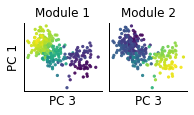

In [14]:
from itertools import product
from matplotlib.gridspec import GridSpec


fig = plt.figure(figsize=(7/2.4, 3/2.4))
gs = GridSpec(1,2)
gs.update(wspace=0.1, hspace=0.7)

    
ax_1 = fig.add_subplot(gs[0, 0])
ax_2 = fig.add_subplot(gs[0, 1])

ax_1.scatter(latent.loc[p90_cells].PC_3, latent.loc[p90_cells].PC_1,
           c = zscore(psix_p90.adata.uns['neighbors_psi'].T.loc[bwow[0].loc[bwow[0] == 1].index],
       axis=1, nan_policy='omit').mean(axis=0), s=5, edgecolor=None, alpha=0.9)
ax_1.set_ylabel('PC 1', fontsize=12)
ax_1.set_xlabel('PC 3', fontsize=12)

ax_1.set_xticks([])
ax_1.set_yticks([])

ax_1.spines["right"].set_visible(False)
ax_1.spines["top"].set_visible(False)
ax_1.set_title('Module 1', fontsize=12)




ax_2.scatter(latent.loc[p90_cells].PC_3, latent.loc[p90_cells].PC_1,
           c = zscore(psix_p90.adata.uns['neighbors_psi'].T.loc[bwow[0].loc[bwow[0] == 2].index],
       axis=1, nan_policy='omit').mean(axis=0), s=5, edgecolor=None, alpha=0.9)
# ax_2.set_ylabel('PC 1', fontsize=12)
ax_2.set_xlabel('PC 3', fontsize=12)
ax_2.set_xticks([])

ax_2.set_yticks([])
ax_2.spines["right"].set_visible(False)
ax_2.spines["top"].set_visible(False)
ax_2.set_title('Module 2', fontsize=12)

plt.savefig('plots/p90_modules_scatterplot.png', bbox_inches='tight', res=20000, dpi =2000)
# plt.show()

In [15]:
mmin1 = np.min(zscore(psix_p90.adata.uns['neighbors_psi'].T.loc[bwow[0].loc[bwow[0] == 1].index], axis=1, nan_policy='omit').mean(axis=0))
mmax1 = np.max(zscore(psix_p90.adata.uns['neighbors_psi'].T.loc[bwow[0].loc[bwow[0] == 1].index], axis=1, nan_policy='omit').mean(axis=0))
mmin2 = np.min(zscore(psix_p90.adata.uns['neighbors_psi'].T.loc[bwow[0].loc[bwow[0] == 2].index], axis=1, nan_policy='omit').mean(axis=0))
mmax2 = np.max(zscore(psix_p90.adata.uns['neighbors_psi'].T.loc[bwow[0].loc[bwow[0] == 2].index], axis=1, nan_policy='omit').mean(axis=0))

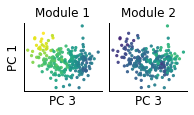

In [16]:
from itertools import product
from matplotlib.gridspec import GridSpec


fig = plt.figure(figsize=(7/2.4, 3/2.4))
gs = GridSpec(1,2)
gs.update(wspace=0.1, hspace=0.7)

    
ax_1 = fig.add_subplot(gs[0, 0])
ax_2 = fig.add_subplot(gs[0, 1])

ax_1.scatter(latent.loc[p1_cells].PC_3, latent.loc[p1_cells].PC_1,
           c = neighbors_psi_p1_z.loc[bwow[0].loc[bwow[0] == 1].index & psix_p1.adata.uns['psi'].columns].mean(axis=0), 
             s=5, edgecolor=None, alpha=0.9, vmax=mmax1, vmin=mmin1)
ax_1.set_ylabel('PC 1', fontsize=12)
ax_1.set_xlabel('PC 3', fontsize=12)

ax_1.set_xticks([])
ax_1.set_yticks([])

ax_1.spines["right"].set_visible(False)
ax_1.spines["top"].set_visible(False)
ax_1.set_title('Module 1', fontsize=12)




ax_2.scatter(latent.loc[p1_cells].PC_3, latent.loc[p1_cells].PC_1,
           c = neighbors_psi_p1_z.loc[bwow[0].loc[bwow[0] == 2].index & psix_p1.adata.uns['psi'].columns].mean(axis=0),
        s=5, edgecolor=None, alpha=0.9, vmax=mmax2, vmin=mmin2)
# ax_2.set_ylabel('PC 1', fontsize=12)
ax_2.set_xlabel('PC 3', fontsize=12)
ax_2.set_xticks([])

ax_2.set_yticks([])
ax_2.spines["right"].set_visible(False)
ax_2.spines["top"].set_visible(False)
ax_2.set_title('Module 2', fontsize=12)

plt.savefig('plots/p1_modules_scatterplot.png', bbox_inches='tight', res=20000, dpi =2000)
# plt.show()

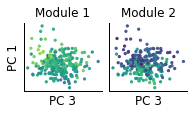

In [17]:
from itertools import product
from matplotlib.gridspec import GridSpec


fig = plt.figure(figsize=(7/2.4, 3/2.4))
gs = GridSpec(1,2)
gs.update(wspace=0.1, hspace=0.7)

    
ax_1 = fig.add_subplot(gs[0, 0])
ax_2 = fig.add_subplot(gs[0, 1])

ax_1.scatter(latent.loc[e13_cells].PC_3, latent.loc[e13_cells].PC_1,
           c = neighbors_psi_e13_z.loc[bwow[0].loc[bwow[0] == 1].index & psix_e13.adata.uns['psi'].columns].mean(axis=0), 
             s=5, edgecolor=None, alpha=0.9, vmax=mmax1, vmin=mmin1)
ax_1.set_ylabel('PC 1', fontsize=12)
ax_1.set_xlabel('PC 3', fontsize=12)

ax_1.set_xticks([])
ax_1.set_yticks([])

ax_1.spines["right"].set_visible(False)
ax_1.spines["top"].set_visible(False)
ax_1.set_title('Module 1', fontsize=12)




ax_2.scatter(latent.loc[e13_cells].PC_3, latent.loc[e13_cells].PC_1,
           c = neighbors_psi_e13_z.loc[bwow[0].loc[bwow[0] == 2].index & psix_e13.adata.uns['psi'].columns].mean(axis=0),
        s=5, edgecolor=None, alpha=0.9, vmax=mmax2, vmin=mmin2)
# ax_2.set_ylabel('PC 1', fontsize=12)
ax_2.set_xlabel('PC 3', fontsize=12)
ax_2.set_xticks([])

ax_2.set_yticks([])
ax_2.spines["right"].set_visible(False)
ax_2.spines["top"].set_visible(False)
ax_2.set_title('Module 2', fontsize=12)

plt.savefig('plots/e13_modules_scatterplot.png', bbox_inches='tight', res=20000, dpi =2000)
# plt.show()

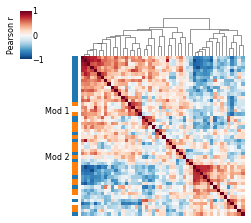

In [18]:
import sys
sys.path.insert(0, '/mnt/lareaulab/cfbuenabadn/psix_project/analysis_psix/utils/')
from misc_utils import *


psix_results = psix_p90.psix_results

background_psi = psix_p90.adata.uns['neighbors_psi'].mask(psix_p90.adata.uns['psi'].isna()).T
exon_list = psix_results.loc[(psix_results.psix_score > 0) & (psix_results.qvals <= 0.05)].index

bwow_p90 = compute_modules(background_psi.loc[exon_list].T.corr().fillna(0), 
                min_gene_threshold=20, fdr_threshold=None, z_threshold=0.1, core_only=False)


exon_list = exon_list & psix_p1.adata.uns['psi'].columns

background_psi = psix_p1.adata.uns['neighbors_psi'].mask(psix_p1.adata.uns['psi'].isna()).T
# exon_list = psix_results.loc[(psix_results.psix_score > 0) & (psix_results.qvals <= 0.05)].index

bwow_p1 = compute_modules(background_psi.loc[exon_list].T.corr().fillna(0), 
                min_gene_threshold=20, fdr_threshold=None, z_threshold=0.1, core_only=False)

aver = local_correlation_plot(
            background_psi.loc[exon_list].T.corr().fillna(0), bwow_p90[0].loc[bwow_p1[0].index], bwow_p1[1],
            mod_cmap='tab10', vmin=-1, vmax=1,
            z_cmap='RdBu_r', yticklabels=False,
    plot_name = 'plots/exon_modules_p1.png', shrink_by=1#/0.5
)

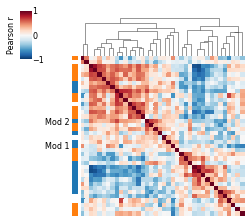

In [19]:
import sys
sys.path.insert(0, '/mnt/lareaulab/cfbuenabadn/psix_project/analysis_psix/utils/')
from misc_utils import *


psix_results = psix_p90.psix_results

background_psi = psix_p90.adata.uns['neighbors_psi'].mask(psix_p90.adata.uns['psi'].isna()).T
exon_list = psix_results.loc[(psix_results.psix_score > 0) & (psix_results.qvals <= 0.05)].index

bwow_p90 = compute_modules(background_psi.loc[exon_list].T.corr().fillna(0), 
                min_gene_threshold=20, fdr_threshold=None, z_threshold=0.1, core_only=False)


exon_list = exon_list & psix_e13.adata.uns['psi'].columns

background_psi = psix_e13.adata.uns['neighbors_psi'].mask(psix_e13.adata.uns['psi'].isna()).T
# exon_list = psix_results.loc[(psix_results.psix_score > 0) & (psix_results.qvals <= 0.05)].index

bwow_e13 = compute_modules(background_psi.loc[exon_list].T.corr().fillna(0), 
                min_gene_threshold=20, fdr_threshold=None, z_threshold=0.1, core_only=False)

aver = local_correlation_plot(
            background_psi.loc[exon_list].T.corr().fillna(0), bwow_p90[0].loc[bwow_e13[0].index], bwow_e13[1],
            mod_cmap='tab10', vmin=-1, vmax=1,
            z_cmap='RdBu_r', yticklabels=False,
    plot_name = 'plots/exon_modules_e13.png', shrink_by=1#/0.5
)

In [20]:
norm_expression = pd.read_csv('data/preprocess/tables/scone_norm_tpm_extended.tab.gz', sep='\t', index_col=0)[latent.index]


# MAKE THIS PLOT

And things we talked with Liana


In [21]:
pearsonr(norm_expression.loc['Rbfox1', p90_cells], neighbors_psi_p90.loc['Stxbp1_2', p90_cells])

(0.5126166888670514, 7.803743397403333e-21)

In [15]:
def nan_pearsonr(x, y):
    non_nan = y.dropna().index
    if len(non_nan) < 15:
        return (np.nan, 1)
    return pearsonr(x.loc[non_nan], y.loc[non_nan])

In [16]:
psix_p90.compute_modules(min_gene_threshold=20, fdr_threshold=None, z_threshold=0.1)

#psix_p90.plot_correlation_modules(plot_name = 'plots/exon_modules_p90.png')

In [17]:
def plot_rbp_neighbors(rbp_name):
    mod1_p90_cor = []
    mod1_p1_cor = []
    mod1_e13_cor = []
    for exon in p90_modules.loc[p90_modules == 1].index:
        mod1_p90_cor.append(
            nan_pearsonr(norm_expression.loc[rbp_name, p90_cells], neighbors_psi_p90.loc[exon, p90_cells])[0]
        )

        mod1_p1_cor.append(
            nan_pearsonr(norm_expression.loc[rbp_name, p1_cells], neighbors_psi_p1.loc[exon, p1_cells])[0]
        )

        mod1_e13_cor.append(
            nan_pearsonr(norm_expression.loc[rbp_name, e13_cells], neighbors_psi_e13.loc[exon, e13_cells])[0]
        )

    mod2_p90_cor = []
    mod2_p1_cor = []
    mod2_e13_cor = []
    for exon in p90_modules.loc[p90_modules == 2].index:
        mod2_p90_cor.append(
            nan_pearsonr(norm_expression.loc[rbp_name, p90_cells], neighbors_psi_p90.loc[exon, p90_cells])[0]
        )

        mod2_p1_cor.append(
            nan_pearsonr(norm_expression.loc[rbp_name, p1_cells], neighbors_psi_p1.loc[exon, p1_cells])[0]
        )

        mod2_e13_cor.append(
            nan_pearsonr(norm_expression.loc[rbp_name, e13_cells], neighbors_psi_e13.loc[exon, e13_cells])[0]
        )    
        
    abs_max = np.max((np.nanmax(np.abs(mod1_e13_cor)), 0))
    abs_max = np.max((np.nanmax(np.abs(mod2_e13_cor)), abs_max))
    abs_max = np.max((np.nanmax(np.abs(mod1_p1_cor)), abs_max))
    abs_max = np.max((np.nanmax(np.abs(mod2_p1_cor)), abs_max))
    abs_max = np.max((np.nanmax(np.abs(mod1_p90_cor)), abs_max))
    abs_max = np.max((np.nanmax(np.abs(mod2_p90_cor)), abs_max))
        
        
    colors = list(plt.get_cmap('tab10').colors)
    fig = plt.figure(figsize=(6/2.4, 4/2.4))
    ax = fig.add_subplot(111)

    ax.grid(False)

    ax.plot([-0.5, 2.5], [0, 0], 'r--')

    ax.scatter(np.random.normal(0, 0.1, len(mod1_e13_cor)), mod1_e13_cor, 
               c=[colors[0]]*len(mod1_e13_cor), alpha=0.75, edgecolor=None)
    ax.scatter(np.random.normal(0, 0.1, len(mod2_e13_cor)), mod2_e13_cor, 
               c=[colors[1]]*len(mod2_e13_cor), alpha=0.75, edgecolor=None)

    ax.scatter(np.random.normal(1, 0.1, len(mod1_p1_cor)), mod1_p1_cor, 
               c=[colors[0]]*len(mod1_p1_cor), alpha=0.75, edgecolor=None)
    ax.scatter(np.random.normal(1, 0.1, len(mod2_p1_cor)), mod2_p1_cor, 
               c=[colors[1]]*len(mod2_p1_cor), alpha=0.75, edgecolor=None)

    ax.scatter(np.random.normal(2, 0.1, len(mod1_p90_cor)), mod1_p90_cor, 
               c=[colors[0]]*len(mod1_p90_cor), alpha=0.75, edgecolor=None)
    ax.scatter(np.random.normal(2, 0.1, len(mod2_p90_cor)), mod2_p90_cor, 
               c=[colors[1]]*len(mod2_p90_cor), alpha=0.75, edgecolor=None)

    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(['E13.5', 'P1', 'P90'], size=12)

    ax.set_ylabel('Pearson r', size=12)

    ax.tick_params(labelsize=12, length=5)
    ax.set_title(rbp_name + ', neighbors', fontsize=12)

    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
    plt.ylim((-abs_max - 0.05, abs_max + 0.05))

    plt.savefig('plots/' + rbp_name + '_neighbors_correlations.png', bbox_inches='tight', res=20000, dpi =2000)

In [18]:
def plot_rbp(rbp_name):
    mod1_p90_cor = []
    mod1_p1_cor = []
    mod1_e13_cor = []
    for exon in p90_modules.loc[p90_modules == 1].index:
        mod1_p90_cor.append(
            nan_pearsonr(norm_expression.loc[rbp_name, p90_cells], psix_object.adata.uns['psi'].loc[p90_cells, exon])[0]
        )

        mod1_p1_cor.append(
            nan_pearsonr(norm_expression.loc[rbp_name, p1_cells], psix_object.adata.uns['psi'].loc[p1_cells, exon])[0]
        )

        mod1_e13_cor.append(
            nan_pearsonr(norm_expression.loc[rbp_name, e13_cells], psix_object.adata.uns['psi'].loc[e13_cells, exon])[0]
        )

    mod2_p90_cor = []
    mod2_p1_cor = []
    mod2_e13_cor = []
    for exon in p90_modules.loc[p90_modules == 2].index:
        mod2_p90_cor.append(
            nan_pearsonr(norm_expression.loc[rbp_name, p90_cells], psix_object.adata.uns['psi'].loc[p90_cells, exon])[0]
        )

        mod2_p1_cor.append(
            nan_pearsonr(norm_expression.loc[rbp_name, p1_cells], psix_object.adata.uns['psi'].loc[p1_cells, exon])[0]
        )

        mod2_e13_cor.append(
            nan_pearsonr(norm_expression.loc[rbp_name, e13_cells], psix_object.adata.uns['psi'].loc[e13_cells, exon])[0]
        )    
        
    abs_max = np.max((np.nanmax(np.abs(mod1_e13_cor)), 0))
    abs_max = np.max((np.nanmax(np.abs(mod2_e13_cor)), abs_max))
    abs_max = np.max((np.nanmax(np.abs(mod1_p1_cor)), abs_max))
    abs_max = np.max((np.nanmax(np.abs(mod2_p1_cor)), abs_max))
    abs_max = np.max((np.nanmax(np.abs(mod1_p90_cor)), abs_max))
    abs_max = np.max((np.nanmax(np.abs(mod2_p90_cor)), abs_max))
        
        
    colors = list(plt.get_cmap('tab10').colors)
    fig = plt.figure(figsize=(6/2.4, 4/2.4))
    ax = fig.add_subplot(111)

    ax.grid(False)

    ax.plot([-0.5, 2.5], [0, 0], 'r--')

    ax.scatter(np.random.normal(0, 0.1, len(mod1_e13_cor)), mod1_e13_cor, 
               c=[colors[0]]*len(mod1_e13_cor), alpha=0.75, edgecolor=None, s=20)
    ax.scatter(np.random.normal(0, 0.1, len(mod2_e13_cor)), mod2_e13_cor, 
               c=[colors[1]]*len(mod2_e13_cor), alpha=0.75, edgecolor=None, s=20)

    ax.scatter(np.random.normal(1, 0.1, len(mod1_p1_cor)), mod1_p1_cor, 
               c=[colors[0]]*len(mod1_p1_cor), alpha=0.75, edgecolor=None, s=20)
    ax.scatter(np.random.normal(1, 0.1, len(mod2_p1_cor)), mod2_p1_cor, 
               c=[colors[1]]*len(mod2_p1_cor), alpha=0.75, edgecolor=None, s=20)

    ax.scatter(np.random.normal(2, 0.1, len(mod1_p90_cor)), mod1_p90_cor, 
               c=[colors[0]]*len(mod1_p90_cor), alpha=0.75, edgecolor=None, s=20)
    ax.scatter(np.random.normal(2, 0.1, len(mod2_p90_cor)), mod2_p90_cor, 
               c=[colors[1]]*len(mod2_p90_cor), alpha=0.75, edgecolor=None, s=20)

    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(['E13.5', 'P1', 'P90'], size=12)

    ax.set_ylabel('Pearson r', size=12)

    ax.tick_params(labelsize=12, length=5)
    ax.set_title(rbp_name, fontsize=12)

    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
    plt.ylim((-abs_max - 0.05, abs_max + 0.05))

    plt.savefig('plots/' + rbp_name + '_correlations.png', bbox_inches='tight', res=20000, dpi =2000)

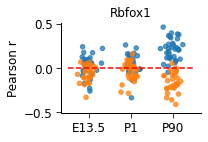

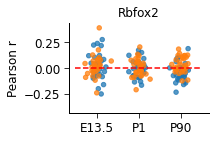

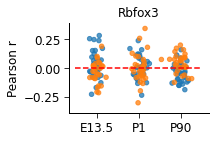

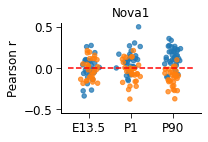

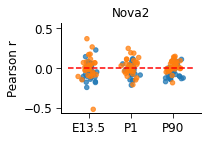

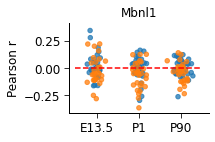

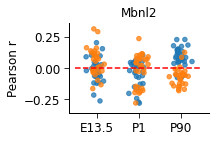

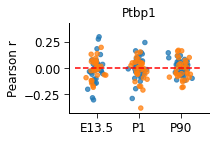

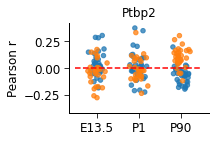

In [235]:
plot_rbp('Rbfox1')
plot_rbp('Rbfox2')
plot_rbp('Rbfox3')
plot_rbp('Nova1')
plot_rbp('Nova2')
plot_rbp('Mbnl1')
plot_rbp('Mbnl2')
plot_rbp('Ptbp1')
plot_rbp('Ptbp2')

In [19]:
plot_rbp_neighbors('Rbfox1')
plot_rbp_neighbors('Rbfox2')
plot_rbp_neighbors('Rbfox3')
plot_rbp_neighbors('Nova1')
plot_rbp_neighbors('Nova2')
plot_rbp_neighbors('Mbnl1')
plot_rbp_neighbors('Mbnl2')
plot_rbp_neighbors('Ptbp1')
plot_rbp_neighbors('Ptbp2')

NameError: name 'p90_modules' is not defined

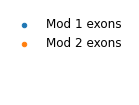

In [238]:
colors = list(plt.get_cmap('tab10').colors)
fig = plt.figure(figsize=(4/2.4, 4/2.4))
ax = fig.add_subplot(111)

ax.grid(False)

ax.scatter([-10], [-10], c=[colors[0]], edgecolor=None, s=20, label='Mod 1 exons')
ax.scatter([-10], [-10], c=[colors[1]], edgecolor=None, s=20, label='Mod 2 exons')


ax.set_xticks([])
ax.set_yticks([])


ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

plt.ylim((- 0.05, 0.05))
plt.legend(frameon=False, fontsize=12)

plt.savefig('plots/module_correlations_labels.png', bbox_inches='tight', res=20000, dpi =2000)

In [ ]:
psix_object = psix.Psix()
psix_object.process_rnaseq(
        exon_sj_file = 'data/preprocess/tables/p90_SE_counts_filtered.tab.gz',
        constitutive_sj_file = 'data/preprocess/tables/p90_constitutive_introns_filtered.tab.gz',
        tpm_file = 'data/preprocess/tables/p90_rsem_gene_tpm_filtered.tab.gz',
        minJR = 1,
        minCell=1,
        min_observed = 0.05, min_psi = 0.001)

In [ ]:
# sig_p90_modules = bwow[0].index[bwow[0] > 0]


In [30]:
def get_all_exons_neighbors(psi, cell_metric):
    
    neighbors_psi = []
    
    for exon_psi in psi.T:
        neighbors_psi.append(get_exon_neighbors_psi(exon_psi, cell_metric))
        
    return np.array(neighbors_psi)


def get_background(psi, metric):
#     psi = np.array(self.adata.uns['psi'])
    
    neighbors_psi = pd.DataFrame(get_all_exons_neighbors(np.array(psi), metric),
                                 columns = psi.index,
                                 index = psi.columns)
    return neighbors_psi



import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from tqdm import tqdm 
from numba import jit

def compute_cell_metric_light(
    manifold, 
    n_neighbors=100, 
    weight_metric = True,
):
    
    
    cells = manifold.index
    n_cells = len(cells)
    
    knn_neighbors = NearestNeighbors(n_neighbors=n_neighbors+1).fit(manifold)
    distances, indices = knn_neighbors.kneighbors(manifold)
    
    
    
    neighbor_indices = pd.DataFrame(indices, index=cells)
    
    weights = np.ones((len(cells), (n_neighbors+1)))
    
    for i in tqdm(range(len(manifold.index)), position=0, leave=True):
        sigma = np.max(distances[i])
        for j in range(1, len(distances[i])):
            d = distances[i][j]
            w = compute_weight(d, sigma)
            weights[i, j] = w
        
    cell_metric = (indices, weights)
    return cell_metric


@jit(nopython=True)
def compute_weight(d, sigma):
    return np.exp(-(d**2)/(sigma**2)) 


@jit(nopython=True)
def get_exon_neighbors_psi(observed_psi_array, cell_metric):
    psi_a_array = []
    for i in range(len(observed_psi_array)):
#         psi_o = observed_psi_array[i]
                    
#         psi_o_array.append(psi_o)

        neighbors = cell_metric[0][i]
        weights = cell_metric[1][i]

        psi_sum = 0
        weight_sum = 0
        for j in range(len(neighbors)):
            psi_n = observed_psi_array[neighbors[j]]
            if not np.isnan(psi_n):
                psi_sum += (psi_n * weights[j])
                weight_sum += weights[j]
        if weight_sum > 0:
            psi_a_array.append(psi_sum/weight_sum)
        else:
            psi_a_array.append(np.nan)
                
    return psi_a_array


latent = pd.read_csv('data/preprocess/tables/pc3_rd.tab.gz', sep='\t', index_col=0)

cell_metric = compute_cell_metric_light(pd.DataFrame(latent.loc[p90_cells][['PC_1', 'PC_2', 'PC_3']]), n_neighbors=30)
neighbors_psi_p90 = get_background(psix_object.adata.uns['psi'].loc[p90_cells], cell_metric)
neighbors_psi_p90_z = pd.DataFrame(zscore(neighbors_psi_p90, axis=1, nan_policy='omit'),
                                   columns = neighbors_psi_p90.columns,
                                   index = neighbors_psi_p90.index).fillna(0)

cell_metric = compute_cell_metric_light(pd.DataFrame(latent.loc[p1_cells][['PC_1', 'PC_2', 'PC_3']]), n_neighbors=30)
neighbors_psi_p1 = get_background(psix_object.adata.uns['psi'].loc[p1_cells], cell_metric)
neighbors_psi_p1_z = pd.DataFrame(zscore(neighbors_psi_p1, axis=1, nan_policy='omit'),
                                   columns = neighbors_psi_p1.columns,
                                   index = neighbors_psi_p1.index).fillna(0)


cell_metric = compute_cell_metric_light(pd.DataFrame(latent.loc[e13_cells][['PC_1', 'PC_2', 'PC_3']]), n_neighbors=30)
neighbors_psi_e13 = get_background(psix_object.adata.uns['psi'].loc[e13_cells], cell_metric)
neighbors_psi_e13_z = pd.DataFrame(zscore(neighbors_psi_e13, axis=1, nan_policy='omit'),
                                   columns = neighbors_psi_e13.columns,
                                   index = neighbors_psi_e13.index).fillna(0)

100%|██████████| 240/240 [00:00<00:00, 17220.94it/s]


In [48]:
remaining = pd.Index(sig_exons_p90) & psix_object.adata.uns['psi'].columns
neighbors_psi_p90_z.loc[remaining]

from sklearn.decomposition import PCA

pc = PCA().fit(neighbors_psi_p90_z.loc[remaining, p90_cells].T.fillna(0))

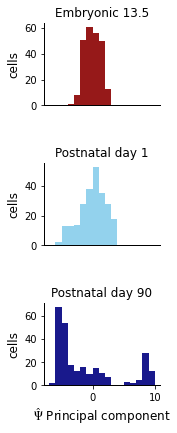

In [50]:
from itertools import product
from matplotlib.gridspec import GridSpec


fig = plt.figure(figsize=(5/2.4, 16/2.4))
gs = GridSpec(3,1)
gs.update(wspace=1, hspace=0.7)

    
ax_1 = fig.add_subplot(gs[0, 0])
ax_2 = fig.add_subplot(gs[1, 0])
ax_3 = fig.add_subplot(gs[2, 0])

ax_1.hist(pc.transform(neighbors_psi_e13_z.loc[remaining, e13_cells].T.fillna(0)).T[0], alpha=0.9, bins=range(-7, 11, 1),
        color='darkred')
ax_1.set_ylabel('cells', fontsize=12)
ax_1.set_xticks([])
ax_1.spines["right"].set_visible(False)
ax_1.spines["top"].set_visible(False)
ax_1.set_title('Embryonic 13.5', fontsize=12)

ax_2.hist(pc.transform(neighbors_psi_p1_z.loc[remaining, p1_cells].T.fillna(0)).T[0], alpha=0.9, bins=range(-7, 11, 1),
        color='skyblue')
ax_2.set_xticks([])
ax_2.set_ylabel('cells', fontsize=12)
ax_2.spines["right"].set_visible(False)
ax_2.spines["top"].set_visible(False)
ax_2.set_title('Postnatal day 1', fontsize=12)


ax_3.hist(pc.transform(neighbors_psi_p90_z.loc[remaining, p90_cells].T.fillna(0)).T[0], alpha=0.9,
        bins=range(-7, 11, 1), color='navy')
ax_3.spines["right"].set_visible(False)
ax_3.spines["top"].set_visible(False)
ax_3.set_title('Postnatal day 90', fontsize=12)
ax_3.set_ylabel('cells', fontsize=12)
ax_3.set_xlabel('$\hat{\Psi}$ Principal component', fontsize=12)

plt.savefig('plots/p90_principal_component.png', bbox_inches='tight', res=20000, dpi =2000)


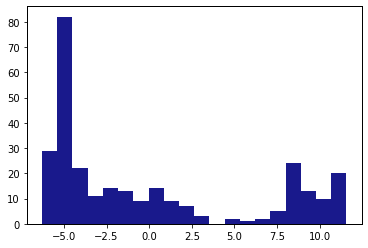

In [84]:
from itertools import product
from matplotlib.gridspec import GridSpec


fig = plt.figure(figsize=(5/2.4, 16/2.4))
gs = GridSpec(3,1)
gs.update(wspace=1, hspace=0.7)

    
ax_1 = fig.add_subplot(gs[0, 0])
ax_2 = fig.add_subplot(gs[1, 0])
ax_3 = fig.add_subplot(gs[2, 0])

ax_1.hist(pc.transform(neighbors_psi_e13_z.loc[remaining, e13_cells].T.fillna(0)).T[0], alpha=0.9, bins=range(-6, 11, 1),
        color='darkred')
ax_1.set_ylabel('cells', fontsize=12)
ax_1.set_xticks([])
ax_1.spines["right"].set_visible(False)
ax_1.spines["top"].set_visible(False)
ax_1.set_title('Embryonic 13.5', fontsize=12)

ax_2.hist(pc.transform(neighbors_psi_p1_z.loc[remaining, p1_cells].T.fillna(0)).T[0], alpha=0.9, bins=range(-6, 11, 1),
        color='skyblue')
ax_2.set_xticks([])
ax_2.set_ylabel('cells', fontsize=12)
ax_2.spines["right"].set_visible(False)
ax_2.spines["top"].set_visible(False)
ax_2.set_title('Postnatal day 1', fontsize=12)


ax_3.hist(pc.transform(neighbors_psi_p90_z.loc[remaining, p90_cells].T.fillna(0)).T[0], alpha=0.9,
        bins=range(-6, 11, 1), color='navy')
ax_3.spines["right"].set_visible(False)
ax_3.spines["top"].set_visible(False)
ax_3.set_title('Postnatal day 90', fontsize=12)
ax_3.set_ylabel('cells', fontsize=12)
ax_3.set_xlabel('$\hat{\Psi}$ Principal component', fontsize=12)

plt.savefig('plots/p90_principal_component.png', bbox_inches='tight', res=20000, dpi =2000)


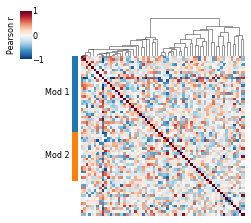

In [19]:
import sys
sys.path.insert(0, '/mnt/lareaulab/cfbuenabadn/psix_project/analysis_psix/utils/')
from misc_utils import *


psix_results = psix_p90.psix_results

background_psi = psix_p90.adata.uns['neighbors_psi'].mask(psix_p90.adata.uns['psi'].isna()).T
exon_list = psix_results.loc[(psix_results.psix_score > 0) & (psix_results.qvals <= 0.05)].index
# exon_list = exon_list & psix_e18.psix_results.index

bwow = compute_modules(background_psi.loc[exon_list].T.corr().fillna(0), 
                min_gene_threshold=10, fdr_threshold=None, z_threshold=0.1, core_only=False)


# psix_results = psix_e18.psix_results

# background_psi = psix_e18.adata.uns['neighbors_psi'].mask(psix_e18.adata.uns['psi'].isna()).T
# # exon_list = psix_results.loc[(psix_results.psix_score > 0) & (psix_results.qvals <= 0.05)].index

# # bwow = compute_modules(background_psi.loc[exon_list].T.corr().fillna(0), 
# #                 min_gene_threshold=10, fdr_threshold=None, z_threshold=0.1, core_only=False)

aver = local_correlation_plot(
            neighbors_psi_e13.loc[exon_list].T.corr().fillna(0), bwow[0], bwow[1],
            mod_cmap='tab10', vmin=-1, vmax=1,
            z_cmap='RdBu_r', yticklabels=False,
    plot_name = 'plots/exon_modules_e13.png'
)

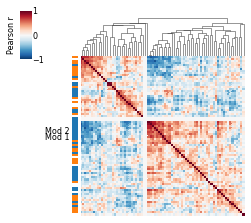

In [101]:
import sys
sys.path.insert(0, '/mnt/lareaulab/cfbuenabadn/psix_project/analysis_psix/utils/')
from misc_utils import *


psix_results = psix_p90.psix_results

background_psi = psix_p90.adata.uns['neighbors_psi'].mask(psix_p90.adata.uns['psi'].isna()).T
exon_list = psix_results.loc[(psix_results.psix_score > 0) & (psix_results.qvals <= 0.05)].index
# exon_list = exon_list & psix_e18.psix_results.index

bwow_p90 = compute_modules(background_psi.loc[exon_list].T.corr().fillna(0), 
                min_gene_threshold=20, fdr_threshold=None, z_threshold=0.1, core_only=False)



background_psi = psix_p1.adata.uns['neighbors_psi'].mask(psix_p90.adata.uns['psi'].isna()).T
exon_list = psix_results.loc[(psix_results.psix_score > 0) & (psix_results.qvals <= 0.05)].index
# exon_list = exon_list & psix_e18.psix_results.index

bwow_p1 = compute_modules(neighbors_psi_p1.loc[exon_list].T.corr().fillna(0), 
                min_gene_threshold=20, fdr_threshold=None, z_threshold=0.1, core_only=False)



# psix_results = psix_e18.psix_results

# background_psi = psix_e18.adata.uns['neighbors_psi'].mask(psix_e18.adata.uns['psi'].isna()).T
# # exon_list = psix_results.loc[(psix_results.psix_score > 0) & (psix_results.qvals <= 0.05)].index

# # bwow = compute_modules(background_psi.loc[exon_list].T.corr().fillna(0), 
# #                 min_gene_threshold=10, fdr_threshold=None, z_threshold=0.1, core_only=False)

aver = local_correlation_plot(
            neighbors_psi_p1.loc[exon_list].T.corr().fillna(0), bwow_p90[0], bwow_p1[1],
            mod_cmap='tab10', vmin=-1, vmax=1,
            z_cmap='RdBu_r', yticklabels=False,
    plot_name = 'plots/exon_modules_p1.png'
)

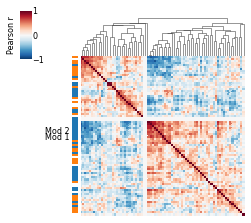

In [105]:
import sys
sys.path.insert(0, '/mnt/lareaulab/cfbuenabadn/psix_project/analysis_psix/utils/')
from misc_utils import *


psix_results = psix_p90.psix_results

background_psi = psix_p90.adata.uns['neighbors_psi'].mask(psix_p90.adata.uns['psi'].isna()).T
exon_list = psix_results.loc[(psix_results.psix_score > 0) & (psix_results.qvals <= 0.05)].index
# exon_list = exon_list & psix_e18.psix_results.index

bwow_p90 = compute_modules(background_psi.loc[exon_list].T.corr().fillna(0), 
                min_gene_threshold=20, fdr_threshold=None, z_threshold=0.1, core_only=False)



background_psi = psix_p1.adata.uns['neighbors_psi'].mask(psix_p90.adata.uns['psi'].isna()).T
exon_list = psix_results.loc[(psix_results.psix_score > 0) & (psix_results.qvals <= 0.05)].index
# exon_list = exon_list & psix_e18.psix_results.index

bwow_p1 = compute_modules(neighbors_psi_p1.loc[exon_list].T.corr().fillna(0), 
                min_gene_threshold=20, fdr_threshold=None, z_threshold=0.1, core_only=False)



# psix_results = psix_e18.psix_results

# background_psi = psix_e18.adata.uns['neighbors_psi'].mask(psix_e18.adata.uns['psi'].isna()).T
# # exon_list = psix_results.loc[(psix_results.psix_score > 0) & (psix_results.qvals <= 0.05)].index

# # bwow = compute_modules(background_psi.loc[exon_list].T.corr().fillna(0), 
# #                 min_gene_threshold=10, fdr_threshold=None, z_threshold=0.1, core_only=False)

aver = local_correlation_plot(
            neighbors_psi_p1.loc[exon_list].T.corr().fillna(0), bwow_p90[0], bwow_p1[1],
            mod_cmap='tab10', vmin=-1, vmax=1,
            z_cmap='RdBu_r', yticklabels=False,
    plot_name = 'plots/exon_modules_p1.png'
)

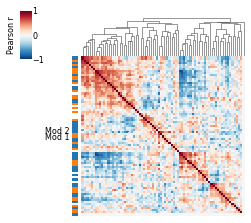

In [102]:
import sys
sys.path.insert(0, '/mnt/lareaulab/cfbuenabadn/psix_project/analysis_psix/utils/')
from misc_utils import *


psix_results = psix_p90.psix_results

background_psi = psix_p90.adata.uns['neighbors_psi'].mask(psix_p90.adata.uns['psi'].isna()).T
exon_list = psix_results.loc[(psix_results.psix_score > 0) & (psix_results.qvals <= 0.05)].index
# exon_list = exon_list & psix_e18.psix_results.index

bwow_p90 = compute_modules(background_psi.loc[exon_list].T.corr().fillna(0), 
                min_gene_threshold=20, fdr_threshold=None, z_threshold=0.1, core_only=False)



background_psi = psix_e13.adata.uns['neighbors_psi'].mask(psix_p90.adata.uns['psi'].isna()).T
exon_list = psix_results.loc[(psix_results.psix_score > 0) & (psix_results.qvals <= 0.05)].index
# exon_list = exon_list & psix_e18.psix_results.index

bwow_e13 = compute_modules(neighbors_psi_e13.loc[exon_list].T.corr().fillna(0), 
                min_gene_threshold=20, fdr_threshold=None, z_threshold=0.1, core_only=False)



# psix_results = psix_e18.psix_results

# background_psi = psix_e18.adata.uns['neighbors_psi'].mask(psix_e18.adata.uns['psi'].isna()).T
# # exon_list = psix_results.loc[(psix_results.psix_score > 0) & (psix_results.qvals <= 0.05)].index

# # bwow = compute_modules(background_psi.loc[exon_list].T.corr().fillna(0), 
# #                 min_gene_threshold=10, fdr_threshold=None, z_threshold=0.1, core_only=False)

aver = local_correlation_plot(
            neighbors_psi_e13.loc[exon_list].T.corr().fillna(0), bwow_p90[0], bwow_e13[1],
            mod_cmap='tab10', vmin=-1, vmax=1,
            z_cmap='RdBu_r', yticklabels=False,
    plot_name = 'plots/exon_modules_e13.png'
)

In [12]:
psix_object.adata.uns['neighbor_psi']

NameError: name 'psix_object' is not defined

In [81]:
norm_expression = pd.read_csv('data/preprocess/tables/scone_norm_tpm_extended.tab.gz', sep='\t', index_col=0)[latent.index]


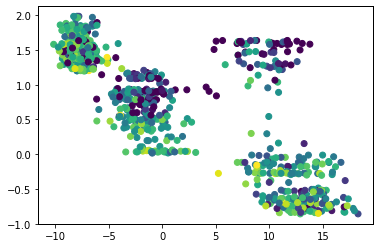

In [157]:
plt.scatter(latent.loc[e13_cells].PC_1,
            pc.transform(neighbors_psi_e13.loc[remaining, e13_cells].T.fillna(0)).T[0],
           c = norm_expression.loc['Nova1', e13_cells])


plt.scatter(latent.loc[p1_cells].PC_1,
            pc.transform(neighbors_psi_p1.loc[remaining, p1_cells].T.fillna(0)).T[0],
           c = norm_expression.loc['Nova1', p1_cells])

plt.scatter(latent.loc[p90_cells].PC_1,
            pc.transform(neighbors_psi_p90.loc[remaining, p90_cells].T.fillna(0)).T[0],
           c = norm_expression.loc['Nova1', p90_cells])

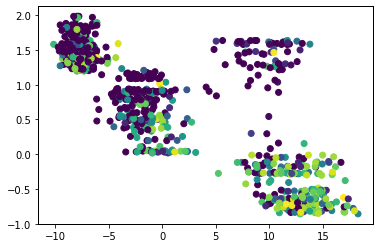

In [161]:
plt.scatter(latent.loc[e13_cells].PC_1,
            pc.transform(neighbors_psi_e13.loc[remaining, e13_cells].T.fillna(0)).T[0],
           c = norm_expression.loc['Rbfox1', e13_cells])


plt.scatter(latent.loc[p1_cells].PC_1,
            pc.transform(neighbors_psi_p1.loc[remaining, p1_cells].T.fillna(0)).T[0],
           c = norm_expression.loc['Rbfox1', p1_cells])

plt.scatter(latent.loc[p90_cells].PC_1,
            pc.transform(neighbors_psi_p90.loc[remaining, p90_cells].T.fillna(0)).T[0],
           c = norm_expression.loc['Rbfox1', p90_cells])

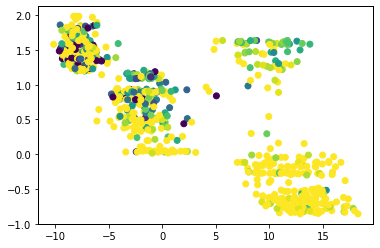

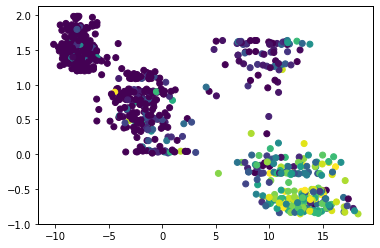

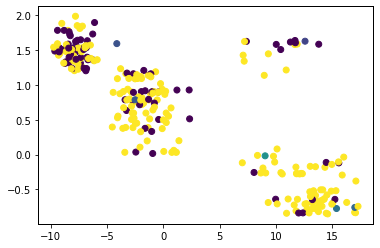

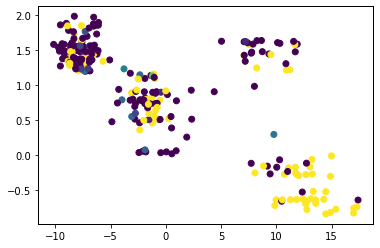

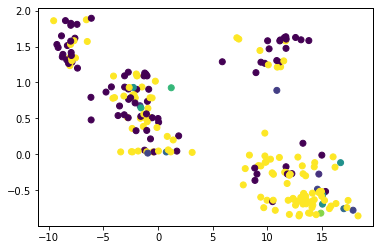

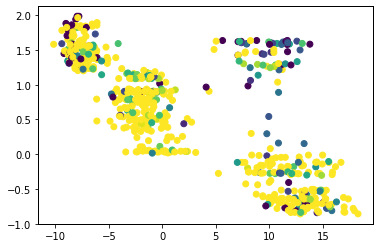

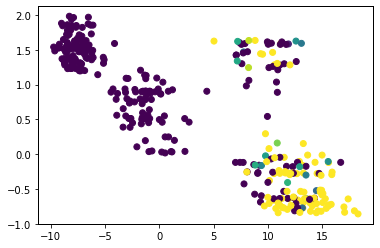

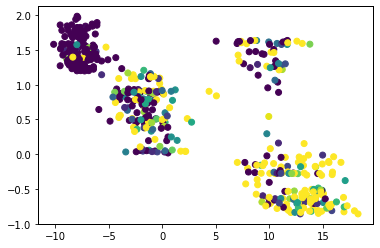

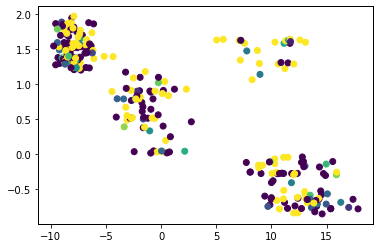

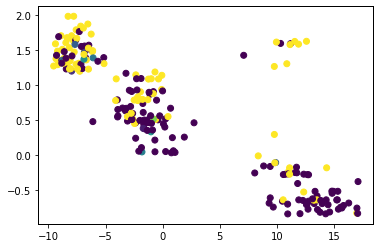

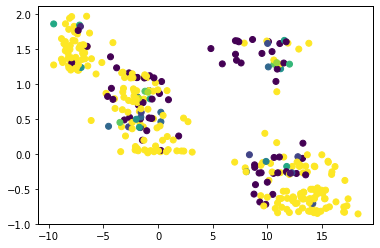

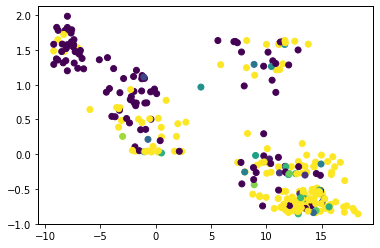

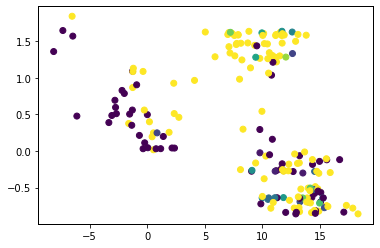

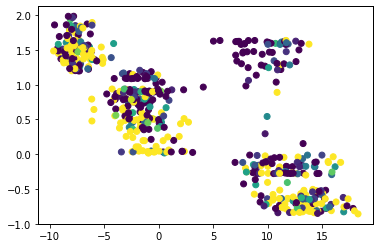

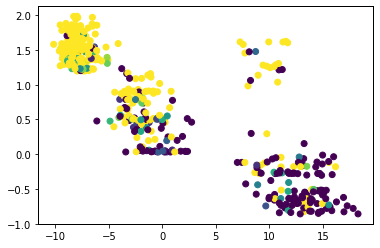

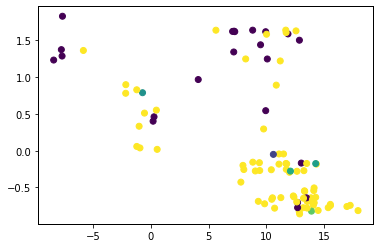

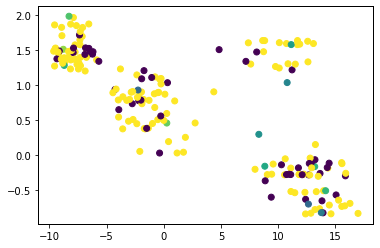

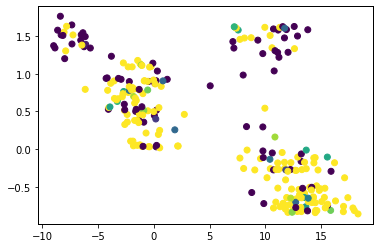

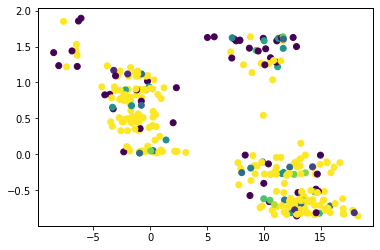

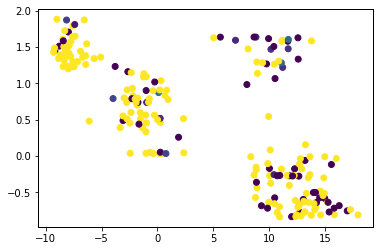

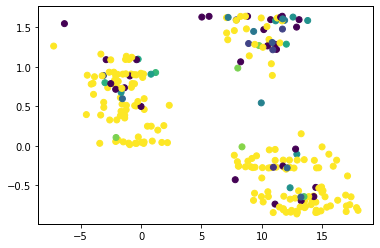

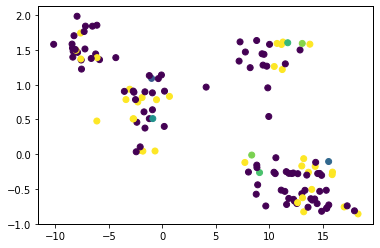

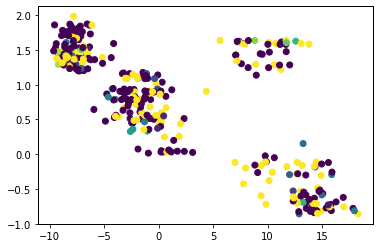

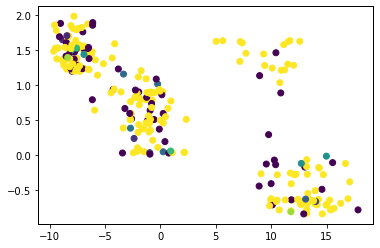

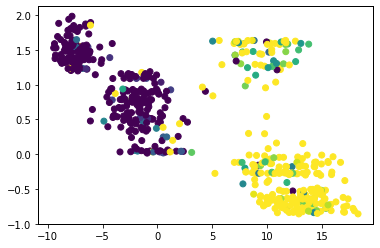

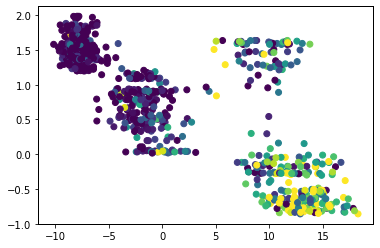

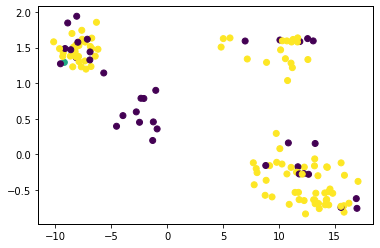

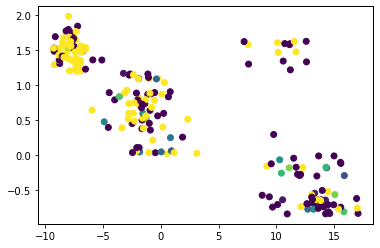

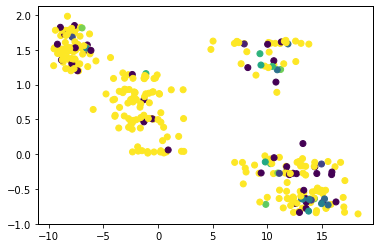

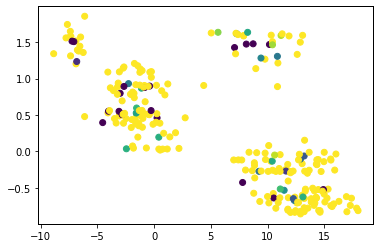

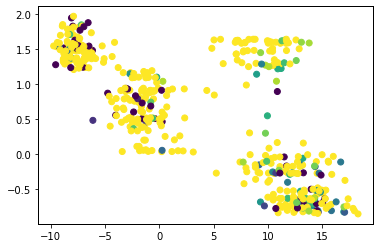

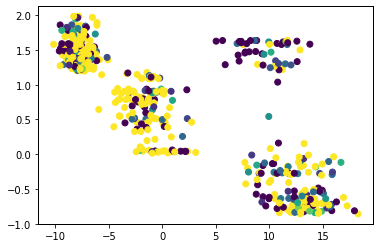

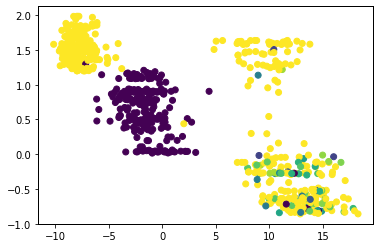

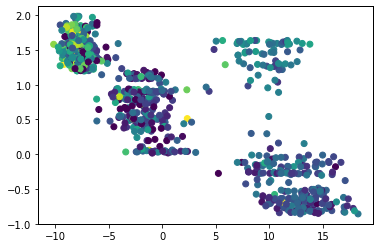

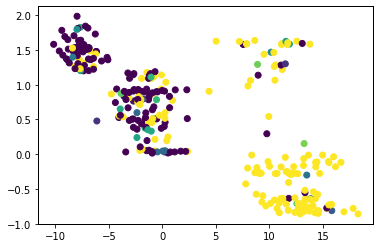

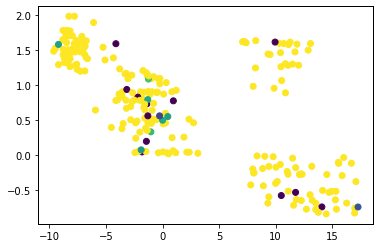

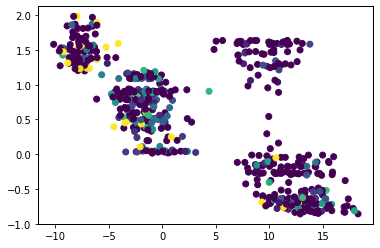

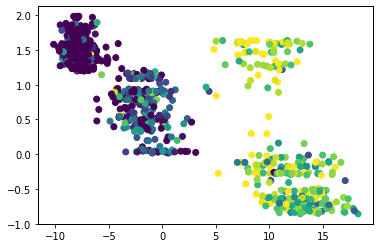

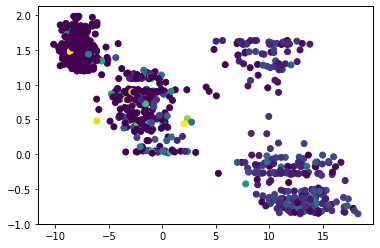

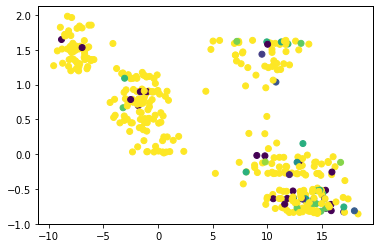

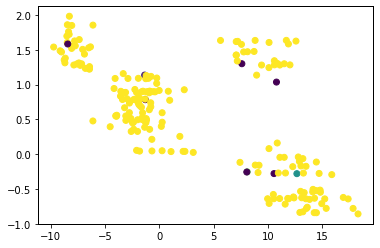

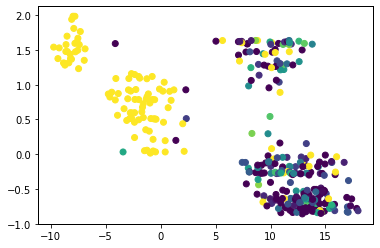

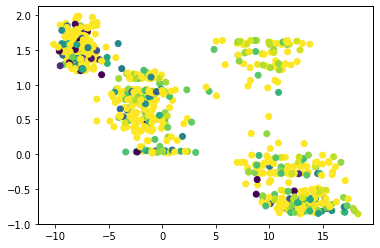

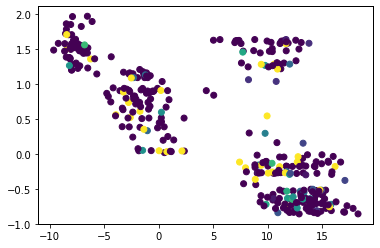

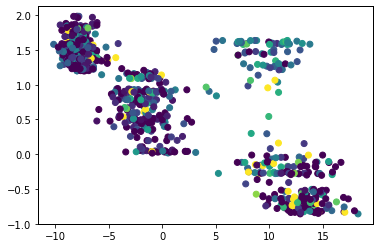

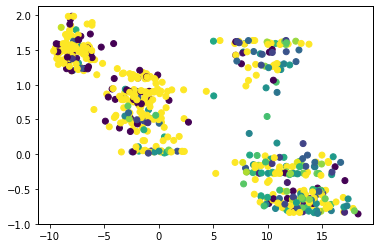

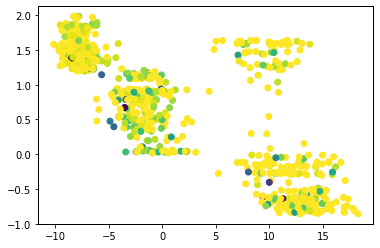

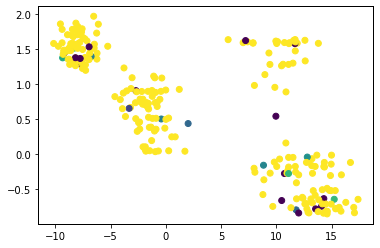

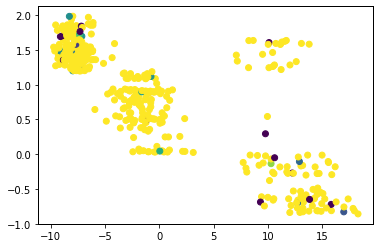

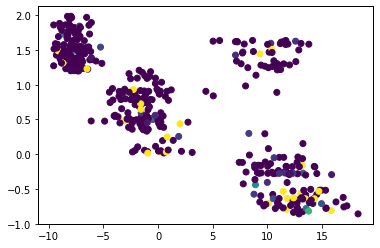

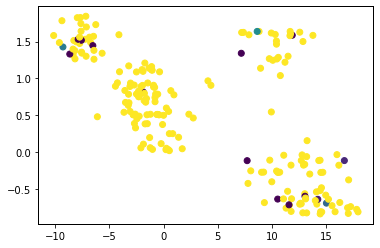

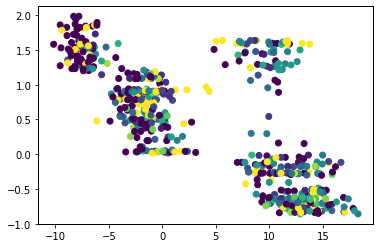

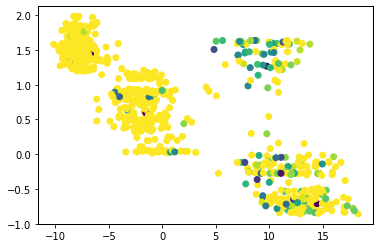

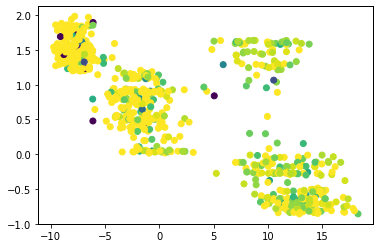

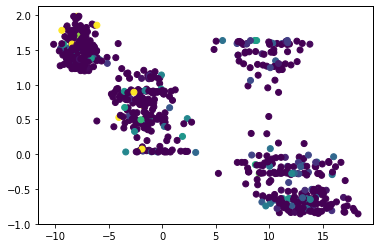

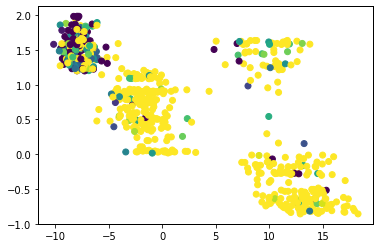

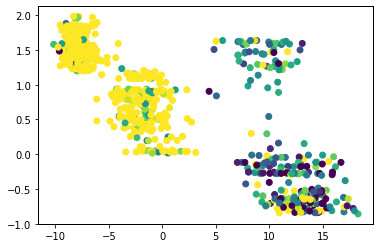

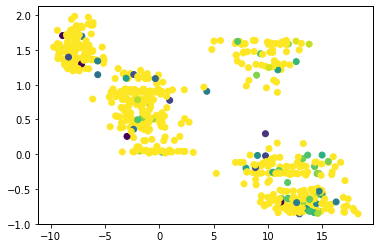

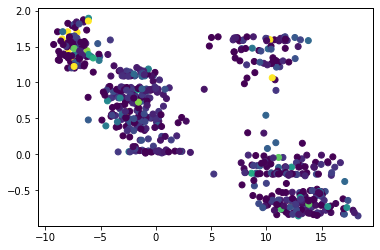

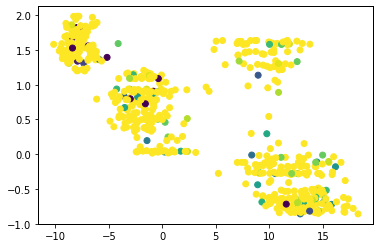

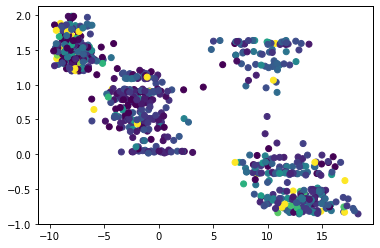

In [236]:
for exon in sig_exons_p90:
    plt.scatter(latent.loc[e13_cells].PC_1,
                pc.transform(neighbors_psi_e13.loc[remaining, e13_cells].T.fillna(0)).T[0],
               c = psix_object.adata.uns['psi'].loc[e13_cells, exon])


    plt.scatter(latent.loc[p1_cells].PC_1,
                pc.transform(neighbors_psi_p1.loc[remaining, p1_cells].T.fillna(0)).T[0],
               c = psix_object.adata.uns['psi'].loc[p1_cells, exon])

    plt.scatter(latent.loc[p90_cells].PC_1,
                pc.transform(neighbors_psi_p90.loc[remaining, p90_cells].T.fillna(0)).T[0],
               c = psix_object.adata.uns['psi'].loc[p90_cells, exon])
    
    plt.show()

In [171]:
pearsonr(pc.transform(neighbors_psi_p90.loc[remaining, p90_cells].T.fillna(0)).T[0], 
            norm_expression.loc['Th', p90_cells])

(0.6951384855091023, 3.503721559173553e-43)

In [223]:
pearsonr(pc.transform(neighbors_psi_p90.loc[remaining, p90_cells].T.fillna(0)).T[0], 
            norm_expression.loc['Ptbp2', p90_cells])

(0.22108686602213026, 0.00014717416273621225)

In [224]:
pearsonr(pc.transform(neighbors_psi_e13.loc[remaining, e13_cells].T.fillna(0)).T[0], 
            norm_expression.loc['Ptbp2', e13_cells])

(-0.0012755713704247218, 0.9843162713685062)

In [225]:
pearsonr(pc.transform(neighbors_psi_p1.loc[remaining, p1_cells].T.fillna(0)).T[0], 
            norm_expression.loc['Ptbp2', p1_cells])

(0.07410668286249947, 0.2507868192113987)

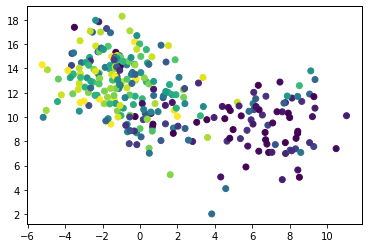

In [109]:
plt.scatter(latent.loc[p90_cells].PC_3, latent.loc[p90_cells].PC_1, c=psix_p90.adata.uns['psi'].loc[p90_cells, 'Stxbp1_2'])

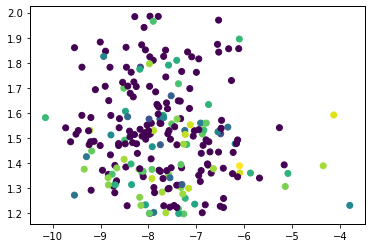

In [208]:
plt.scatter(latent.loc[e13_cells].PC_1,
            pc.transform(neighbors_psi_e13.loc[remaining, e13_cells].T.fillna(0)).T[0],
           c = norm_expression.loc['Rbfox1', e13_cells])


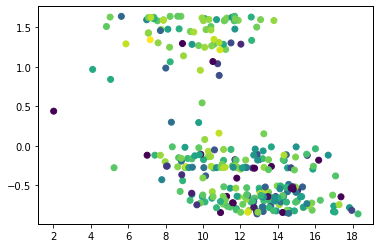

In [227]:
plt.scatter(latent.loc[p90_cells].PC_1,
            pc.transform(neighbors_psi_p90.loc[remaining, p90_cells].T.fillna(0)).T[0],
           c = norm_expression.loc['Ptbp2', p90_cells])


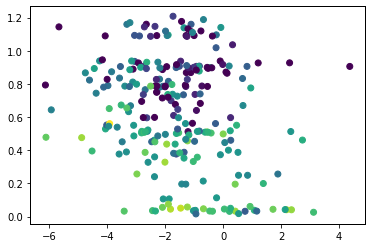

In [197]:
plt.scatter(latent.loc[p1_cells].PC_1,
            pc.transform(neighbors_psi_p1.loc[remaining, p1_cells].T.fillna(0)).T[0],
           c = norm_expression.loc['Nova1', p1_cells])


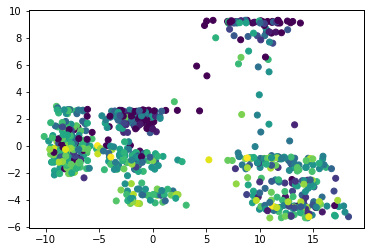

In [257]:
plt.scatter(latent.loc[e13_cells].PC_1,
            pc.transform(neighbors_psi_e13_z.loc[remaining, e13_cells].T.fillna(0)).T[0],
           c = norm_expression.loc['Nova1', e13_cells])


plt.scatter(latent.loc[p1_cells].PC_1,
            pc.transform(neighbors_psi_p1_z.loc[remaining, p1_cells].T.fillna(0)).T[0],
           c = norm_expression.loc['Nova1', p1_cells])

plt.scatter(latent.loc[p90_cells].PC_1,
            pc.transform(neighbors_psi_p90_z.loc[remaining, p90_cells].T.fillna(0)).T[0],
           c = norm_expression.loc['Nova1', p90_cells])

In [265]:
pearsonr(pc.transform(neighbors_psi_p90_z.loc[remaining, p90_cells].T.fillna(0)).T[0], 
            norm_expression.loc['Rbfox1', p90_cells])

(-0.48258752737334887, 2.528900269782421e-18)

In [266]:
pearsonr(pc.transform(neighbors_psi_p1_z.loc[remaining, p1_cells].T.fillna(0)).T[0], 
            norm_expression.loc['Rbfox1', p1_cells])

(-0.3349495643608396, 9.36556516064866e-08)

In [267]:
pearsonr(pc.transform(neighbors_psi_e13_z.loc[remaining, e13_cells].T.fillna(0)).T[0], 
            norm_expression.loc['Rbfox1', e13_cells])

(-0.238782493219355, 0.00018842674272495318)

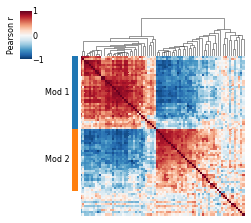

In [17]:
import sys
sys.path.insert(0, '/mnt/lareaulab/cfbuenabadn/psix_project/analysis_psix/utils/')
from misc_utils import *

psix_results = psix_p90.psix_results

background_psi = psix_p90.adata.uns['neighbors_psi'].mask(psix_p90.adata.uns['psi'].isna()).T
exon_list = psix_results.loc[(psix_results.psix_score > 0) & (psix_results.qvals <= 0.05)].index
exon_list = exon_list & psix_p90.psix_results.index

bwow = compute_modules(background_psi.loc[exon_list].T.corr().fillna(0), 
                min_gene_threshold=20, fdr_threshold=None, z_threshold=0.1, core_only=False)

aver = local_correlation_plot(
            background_psi.loc[exon_list].T.corr().fillna(0), bwow[0], bwow[1],
            mod_cmap='tab10', vmin=-1, vmax=1,
            z_cmap='RdBu_r', yticklabels=False,
    plot_name = 'plots/exon_modules_p90_2.png'
)

In [18]:
mod1 = bwow[0].index[bwow[0] == 1]
mod2 = bwow[0].index[bwow[0] == 2]

In [19]:
clip_dir = '~/Network/Mouse/SplicingNetwork/psix_events/clip_seq/'

mouse_clip_peaks = (pd.read_csv(clip_dir + 'peaks_clip_tags_overlap_len.tab', sep='\t', index_col=0) > 0).astype(int)
mouse_clip_peaks = mouse_clip_peaks[[x for x in mouse_clip_peaks.columns if x != 'AGO2']]
s1_exons = [x for x in mouse_clip_peaks.index if x[-3:]=='_s1']
s2_exons = [x for x in mouse_clip_peaks.index if x[-3:]=='_s2']
e1_exons = [x for x in mouse_clip_peaks.index if x[-3:]=='_e1']
e2_exons = [x for x in mouse_clip_peaks.index if x[-3:]=='_e2']

In [20]:
def hyper_test(M, n, N, k):
    '''
    Calculates the hypergeometric test.
    
    Input:
      M: Population size (total exons tested)
      n: Successess in population (exons with p-value <= x)
      N: Sample size (exons selected)
      k: Successes in sample (selected exons with p-value <= x)
    Output:
      p_depleted: p-value of depletion from the hypergeometric test
      p_enriched: p-value of enrichment from the hypergeometric test
    '''
    hpd = hypergeom(M, n, N) # Hypergeometric distribution
    p_depleted = hpd.cdf(k)  # Get cummulative distribution up to k
    p_enriched = hpd.sf(k-1) # Survival function up to k-1 (1 - cdf(k-1))
    return p_depleted, p_enriched


def test_enrichment(binding, exon_cluster):
    M = len(binding)
    n = binding.sum()
    N = len(exon_cluster)
    k = binding.loc[exon_cluster].sum()
    p_depleted, p_enriched = hyper_test(M, n, N, k)
    
    enrichment = (k/N)/(n/M)
    
    if enrichment == 0:
        log_enrich = -3
    else:
        log_enrich = np.log2(enrichment)
        
    
    return p_enriched, p_depleted, log_enrich

from sklearn.neighbors import NearestNeighbors
from tqdm import tqdm
import scipy.stats as ss
from scipy.stats import hypergeom
from statsmodels.stats.multitest import multipletests
import subprocess as sp
from scipy.stats.mstats import zscore

from scipy.stats import pearsonr, spearmanr

In [21]:
sig_exon_binding = [x + '_e1' for x in bwow[0].index] + [x + '_s1' for x in bwow[0].index] + [x + '_s2' for x in bwow[0].index] + [x + '_e2' for x in bwow[0].index]
mod1_binding = [x + '_e1' for x in mod1] + [x + '_s1' for x in mod1] + [x + '_s2' for x in mod1] + [x + '_e2' for x in mod1]
mod2_binding = [x + '_e1' for x in mod2] + [x + '_s1' for x in mod2] + [x + '_s2' for x in mod2] + [x + '_e2' for x in mod2]

In [22]:
# for RBP in mouse_clip_peaks.columns:
    

pval_hyper = pd.DataFrame(np.zeros((2, 31)), columns = mouse_clip_peaks.columns, index = ['mod1', 'mod2'])
enrichment_hyper = pd.DataFrame(np.zeros((2, 31)), columns = mouse_clip_peaks.columns, index = ['mod1', 'mod2'])


for RBP in tqdm(mouse_clip_peaks.columns, position=0, leave=True):
    
    hyper_mod1 = test_enrichment(mouse_clip_peaks.loc[sig_exon_binding, RBP], mod1_binding)
    
    pval_hyper.loc['mod1', RBP] = hyper_mod1[0]
    enrichment_hyper.loc['mod1', RBP] = hyper_mod1[2]
    
    
    hyper_mod2 = test_enrichment(mouse_clip_peaks.loc[sig_exon_binding, RBP], mod2_binding)
            
    pval_hyper.loc['mod2', RBP] = hyper_mod2[0]
    enrichment_hyper.loc['mod2', RBP] = hyper_mod2[2]


100%|██████████| 31/31 [00:00<00:00, 104.67it/s]


In [23]:
pval_hyper = pd.DataFrame(np.zeros((2, 31)), columns = mouse_clip_peaks.columns, index = ['mod1', 'mod2'])
enrichment_hyper = pd.DataFrame(np.zeros((2, 31)), columns = mouse_clip_peaks.columns, index = ['mod1', 'mod2'])


for RBP in tqdm(mouse_clip_peaks.columns, position=0, leave=True):
    
    hyper_mod1 = test_enrichment(mouse_clip_peaks[RBP], mod1_binding)
    
    pval_hyper.loc['mod1', RBP] = hyper_mod1[0]
    enrichment_hyper.loc['mod1', RBP] = hyper_mod1[2]
    
    
    hyper_mod2 = test_enrichment(mouse_clip_peaks[RBP], mod2_binding)
            
    pval_hyper.loc['mod2', RBP] = hyper_mod2[0]
    enrichment_hyper.loc['mod2', RBP] = hyper_mod2[2]


100%|██████████| 31/31 [00:00<00:00, 138.89it/s]


In [24]:
hyper_enrich_significance = pd.DataFrame(multipletests(np.array(pval_hyper).reshape(1,-1)[0], 
                                                       method='fdr_bh')[1].reshape(2,-31),#<=0.1,
                                        columns = mouse_clip_peaks.columns, index = ['mod1', 'mod2'])

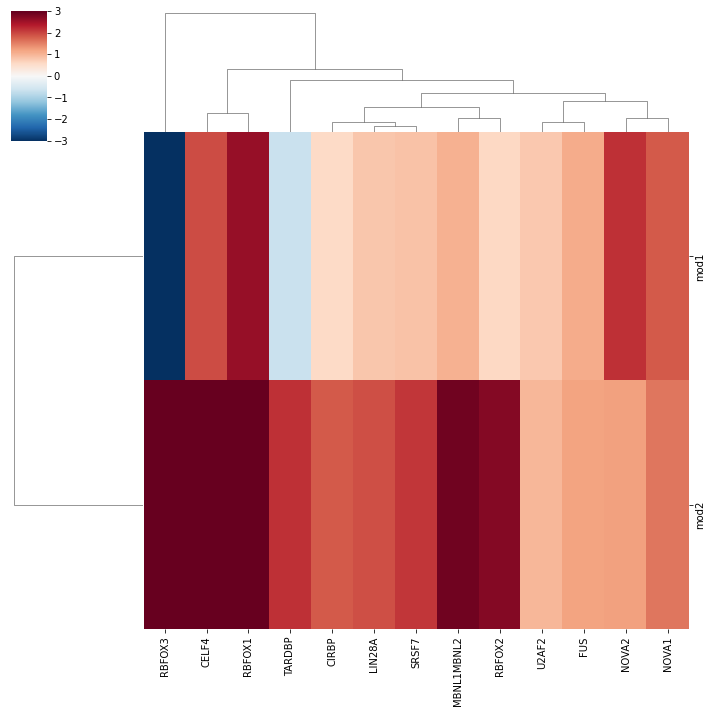

In [25]:
sns.clustermap(enrichment_hyper[hyper_enrich_significance.columns[(hyper_enrich_significance <= 0.05).sum()>0]], cmap='RdBu_r',
           vmax=3, vmin=-3)

In [32]:
norm_expression = pd.read_csv('data/preprocess/tables/scone_norm_tpm_extended.tab.gz', sep='\t', index_col=0)[latent.index]


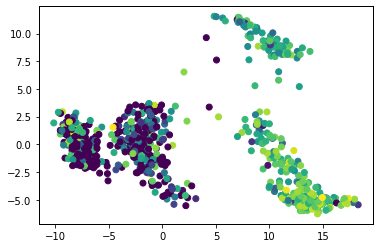

In [187]:
plt.scatter(latent.loc[e13_cells].PC_1,
            pc.transform(neighbors_psi_e13_z.loc[remaining, e13_cells].T.fillna(0)).T[0],
           c = norm_expression.loc['Mbnl2', e13_cells])


plt.scatter(latent.loc[p1_cells].PC_1,
            pc.transform(neighbors_psi_p1_z.loc[remaining, p1_cells].T.fillna(0)).T[0],
           c = norm_expression.loc['Mbnl2', p1_cells])

plt.scatter(latent.loc[p90_cells].PC_1,
            pc.transform(neighbors_psi_p90_z.loc[remaining, p90_cells].T.fillna(0)).T[0],
           c = norm_expression.loc['Mbnl2', p90_cells])

In [33]:
enrichment_hyper[hyper_enrich_significance.columns[(hyper_enrich_significance <= 0.05).sum()>0]]

,MBNL1MBNL2,LIN28A,RBFOX3,NOVA2,CELF4,NOVA1,TARDBP,SRSF7,U2AF2,FUS,RBFOX2,RBFOX1,CIRBP
mod1,1.075426,0.832914,-3.000000,2.184224,1.958069,1.846760,-0.663982,0.881254,0.805352,1.116767,0.612294,2.624169,0.587382
mod2,2.923423,1.943946,3.112579,1.224866,3.636141,1.595221,2.184014,2.144288,0.996236,1.196937,2.749798,3.472165,1.850416


In [51]:
RBP_cannonical_list = ['Ptbp1', 'Ptbp2', 'Mbnl1', 'Mbnl2','Nova1', 'Nova2', 'Rbfox1', 'Rbfox2', 'Rbfox3',
                      'U2af2', 'Fus', 'Cirbp', 'Celf4', 'Tardbp', 'Srsf7']

# RBP_cannonical_list = ['Ptbp1', 'Ptbp2', 'Mbnl1', 'Mbnl2','Nova1', 'Nova2', 'Rbfox1', 'Rbfox2', 'Rbfox3']
correlation = pd.DataFrame(np.zeros((3, len(RBP_cannonical_list))), index = ['E13', 'P1', 'P90'],
                          columns = RBP_cannonical_list)

correlation_sig = pd.DataFrame(np.zeros((3, len(RBP_cannonical_list))), index = ['E13', 'P1', 'P90'],
                          columns = RBP_cannonical_list)


for RBP in RBP_cannonical_list:
    e13_cor = pearsonr(pc.transform(neighbors_psi_e13_z.loc[remaining, e13_cells].T.fillna(0)).T[0], 
            norm_expression.loc[RBP, e13_cells])
    
    correlation.loc['E13', RBP] = e13_cor[0]
    correlation_sig.loc['E13', RBP] = e13_cor[1]
    
    p1_cor = pearsonr(pc.transform(neighbors_psi_p1_z.loc[remaining, p1_cells].T.fillna(0)).T[0], 
            norm_expression.loc[RBP, p1_cells])
    
    correlation.loc['P1', RBP] = p1_cor[0]
    correlation_sig.loc['P1', RBP] = p1_cor[1]
    
    p90_cor = pearsonr(pc.transform(neighbors_psi_p90_z.loc[remaining, p90_cells].T.fillna(0)).T[0], 
            norm_expression.loc[RBP, p90_cells])
    
    correlation.loc['P90', RBP] = p90_cor[0]
    correlation_sig.loc['P90', RBP] = p90_cor[1]

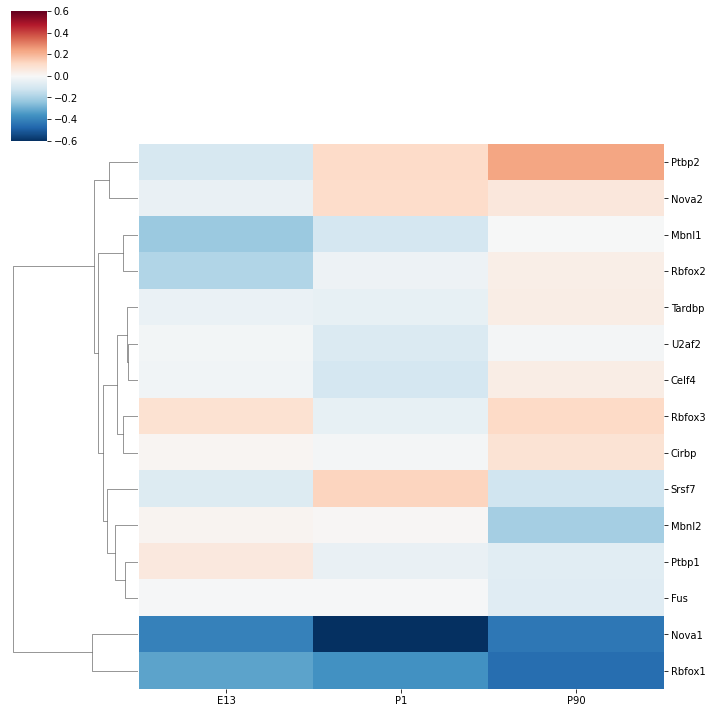

In [38]:
sns.clustermap(correlation.T, cmap='RdBu_r', vmax=0.6, vmin=-0.6, col_cluster=False)

In [39]:
correlation

,Ptbp1,Ptbp2,Mbnl1,Mbnl2,Nova1,Nova2,Rbfox1,Rbfox2,Rbfox3,U2af2,Fus,Cirbp,Celf4,Tardbp,Srsf7
E13,0.064930,-0.100593,-0.221950,0.018095,-0.406199,-0.042382,-0.321392,-0.182443,0.091499,-0.018508,-0.009264,0.011996,-0.018991,-0.041819,-0.081413
P1,-0.045672,0.112663,-0.103546,0.005884,-0.629041,0.110823,-0.361956,-0.031565,-0.049121,-0.086829,-0.006792,-0.011031,-0.107707,-0.050803,0.131888
P90,-0.069976,0.236891,-0.000395,-0.205276,-0.435096,0.066790,-0.457710,0.040058,0.120859,-0.013875,-0.074424,0.085616,0.043637,0.045510,-0.121094


In [40]:
correlation_sig

,Ptbp1,Ptbp2,Mbnl1,Mbnl2,Nova1,Nova2,Rbfox1,Rbfox2,Rbfox3,U2af2,Fus,Cirbp,Celf4,Tardbp,Srsf7
E13,0.316492,0.120138,0.000533,0.780338,5.978064e-11,0.513465,3.606614e-07,0.004576,0.157637,0.775457,0.886476,0.853324,0.769749,0.519084,0.208844
P1,0.479452,0.080271,0.108103,0.927447,4.581387e-28,0.085364,6.655471e-09,0.625109,0.446870,0.178210,0.916287,0.864439,0.094580,0.431440,0.040361
P90,0.234851,0.000046,0.994654,0.000435,7.985755e-15,0.256902,2.012642e-16,0.496827,0.039704,0.813994,0.206350,0.145843,0.459144,0.440080,0.039318


In [52]:
correlation_sig_fdr = pd.DataFrame(multipletests(np.array(correlation_sig).reshape(1,-1)[0], 
                                                       method='fdr_bh')[1].reshape(correlation_sig.shape),#<=0.1,
                                        columns = correlation_sig.columns, index = correlation_sig.index)

In [53]:
rbp_p90 = correlation_sig_fdr.columns[(correlation_sig_fdr <= 0.05).sum() > 0]

In [54]:
rbp_p90

Index(['Ptbp2', 'Mbnl2', 'Nova1', 'Rbfox1'], dtype='object')

In [55]:
labels = (correlation_sig_fdr[rbp_p90] <= 0.05).T

for c in labels.columns:
    for i in labels.index:
        if labels.loc[i, c]:
            labels.loc[i,c] = '*'
        else:
            labels.loc[i,c] = ''

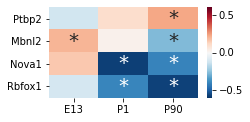

In [56]:
fig = plt.figure(figsize=(8/2.4, 4/2.4))
ax = sns.heatmap(correlation[['Ptbp2', 'Mbnl2', 'Nova1', 'Rbfox1']].T, cmap='RdBu_r', vmax=0.6, vmin=-0.6, 
                 annot=labels, fmt='', annot_kws ={"size":20})



plt.yticks(rotation=0) 

plt.savefig('plots/p90_rbp_correlation.png', bbox_inches='tight', res=20000, dpi =2000)

# plt.show()
# sns.heatmap(correlation[['Ptbp2', 'Mbnl2', 'Nova1', 'Rbfox1']].T, cmap='RdBu_r', vmax=0.6, vmin=-0.6)

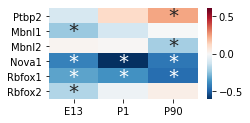

In [46]:
fig = plt.figure(figsize=(8/2.4, 4/2.4))
ax = sns.heatmap(correlation[rbp_p90].T, cmap='RdBu_r', vmax=0.6, vmin=-0.6, 
                 annot=labels, fmt='', annot_kws ={"size":20})



plt.yticks(rotation=0) 

plt.savefig('plots/p90_rbp_correlation_pc3.png', bbox_inches='tight', res=20000, dpi =2000)

# plt.show()
# sns.heatmap(correlation[['Ptbp2', 'Mbnl2', 'Nova1', 'Rbfox1']].T, cmap='RdBu_r', vmax=0.6, vmin=-0.6)

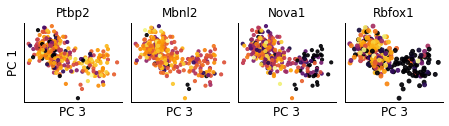

In [220]:
from itertools import product
from matplotlib.gridspec import GridSpec


fig = plt.figure(figsize=(18/2.4, 3.5/2.4))
gs = GridSpec(1,4)
gs.update(wspace=0.1, hspace=0.7)

    
ax_1 = fig.add_subplot(gs[0, 0])
ax_2 = fig.add_subplot(gs[0, 1])
ax_3 = fig.add_subplot(gs[0, 2])
ax_4 = fig.add_subplot(gs[0, 3])

ax_1.scatter(latent.loc[p90_cells].PC_3, latent.loc[p90_cells].PC_1,
           c = norm_expression.loc['Ptbp2', p90_cells], s=10, edgecolor=None, alpha=0.9, cmap='inferno')
ax_1.set_ylabel('PC 1', fontsize=12)
ax_1.set_xlabel('PC 3', fontsize=12)

ax_1.set_xticks([])
ax_1.set_yticks([])

ax_1.spines["right"].set_visible(False)
ax_1.spines["top"].set_visible(False)
ax_1.set_title('Ptbp2', fontsize=12)




ax_2.scatter(latent.loc[p90_cells].PC_3, latent.loc[p90_cells].PC_1,
           c = norm_expression.loc['Mbnl2', p90_cells], s=10, edgecolor=None, alpha=0.9, cmap='inferno')
ax_2.set_xlabel('PC 3', fontsize=12)

ax_2.set_xticks([])
ax_2.set_yticks([])

ax_2.spines["right"].set_visible(False)
ax_2.spines["top"].set_visible(False)
ax_2.set_title('Mbnl2', fontsize=12)

ax_3.scatter(latent.loc[p90_cells].PC_3, latent.loc[p90_cells].PC_1,
           c = norm_expression.loc['Nova1', p90_cells], s=10, edgecolor=None, alpha=0.9, cmap='inferno')
ax_3.set_xlabel('PC 3', fontsize=12)

ax_3.set_xticks([])
ax_3.set_yticks([])

ax_3.spines["right"].set_visible(False)
ax_3.spines["top"].set_visible(False)
ax_3.set_title('Nova1', fontsize=12)



ax_4.scatter(latent.loc[p90_cells].PC_3, latent.loc[p90_cells].PC_1,
           c = norm_expression.loc['Rbfox1', p90_cells], s=15, edgecolor=None, alpha=0.9, cmap='inferno')
ax_4.set_xlabel('PC 3', fontsize=12)

ax_4.set_xticks([])
ax_4.set_yticks([])

ax_4.spines["right"].set_visible(False)
ax_4.spines["top"].set_visible(False)
ax_4.set_title('Rbfox1', fontsize=12)



plt.savefig('plots/p90_rbp_expression.png', bbox_inches='tight', res=20000, dpi =2000)
# plt.show()